# EDA  Fake News

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
data= pd.read_csv('/Users/isaromobru/Desktop/Fake_News1/data/raw/processed/noticias_fake_true.csv')
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
"""Muestra información básica del DataFrame"""
print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
print("\nDimensiones del DataFrame:", data.shape)
print("\nColumnas del DataFrame:", list(data.columns))
print("\nTipos de datos:")
print(data.dtypes)
print("\nValores nulos por columna:")
print(data.isnull().sum())
#print("\nColumnas numéricas:", list(numeric_columns))


=== INFORMACIÓN BÁSICA DEL DATASET ===

Dimensiones del DataFrame: (44898, 5)

Columnas del DataFrame: ['title', 'text', 'subject', 'date', 'label']

Tipos de datos:
title      object
text       object
subject    object
date       object
label       int64
dtype: object

Valores nulos por columna:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


Los tipos de datos la mayoría son object, por lo que estaría bien cambiarlos a categoricos y dte en time

In [5]:
print(len(data['title'].unique()))  # Número


38729


In [6]:
# Ver solo los valores que se repiten más de una vez
repetidos = data['title'].value_counts()
print(repetidos[repetidos > 1])  # Solo muestra los que se repiten


title
Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
                                                                                                         ..
U.S. Congress certifies Trump's Electoral College victory                                                 2
Ex-president George H.W. Bush moved to intensive care; wife hospitalized                                  2
How to Blow $700 Million: Al Jazeera America Finally Calls it Quits                                       2
Merkel says fight agai

In [7]:
data.duplicated().sum()


np.int64(209)

In [8]:
data.drop_duplicates(inplace=True)


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


como se puede observar habia 209 duplicados, por lo que he eliminado las noticias duplicadas ya que puede causar sesgos a la hora de predecir, finalmente ha quedado en 44689 la muestra de 44897 que había antes.

In [11]:
data.subject.value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

los subject al ser la unión de dos dataset sintetizar los datos en subject más goblales 

In [12]:
data.label.value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [20]:
# Primero, crear un conteo de noticias por subject y label
count_data = data.groupby(['subject', 'label']).size().reset_index(name='count')

# Luego crear la tabla pivote
pivot = count_data.pivot_table(
    index='subject',
    columns='label',
    values='count',
    fill_value=0
)

# Mostrar los resultados
print("\nDistribución de noticias por tema y etiqueta:")
print(pivot)

# Opcional: Agregar totales por fila y columna
pivot['Total por tema'] = pivot.sum(axis=1)
pivot.loc['Total por etiqueta'] = pivot.sum()

# Mostrar la tabla con totales
print("\nDistribución con totales:")
print(pivot)


Distribución de noticias por tema y etiqueta:
label                 0        1
subject                         
Government News  1570.0      0.0
Middle-east       778.0      0.0
News             9050.0      0.0
US_News           783.0      0.0
left-news        4459.0      0.0
politics         6838.0      0.0
politicsNews        0.0  11220.0
worldnews           0.0   9991.0

Distribución con totales:
label                     0        1  Total por tema
subject                                             
Government News      1570.0      0.0          1570.0
Middle-east           778.0      0.0           778.0
News                 9050.0      0.0          9050.0
US_News               783.0      0.0           783.0
left-news            4459.0      0.0          4459.0
politics             6838.0      0.0          6838.0
politicsNews            0.0  11220.0         11220.0
worldnews               0.0   9991.0          9991.0
Total por etiqueta  23478.0  21211.0         44689.0


Algunos subject (como Government News, Middle-east, News, etc.) solo tienen noticias falsas (0), mientras que otros (politicsNews, worldnews) solo tienen noticias verdaderas (1).
Es posible que haya un sesgo en los datos o que los datos de ciertos temas estén desequilibrados, con una categoría que tiene muchas noticias verdaderas y ninguna falsa (o viceversa).

## stopWords & Stemming

In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

data['text'] = data['text'].apply(preprocess_text)

PorterStemmer: Es un algoritmo que reduce las palabras a su raíz o forma base. Por ejemplo:

"running" -> "run"
"fishing" -> "fish"
"connected" -> "connect"


stopwords: Son palabras muy comunes que generalmente no aportan significado importante al análisis (como "the", "is", "at", "which", etc.)
Crea una instancia del stemmer
Obtiene el conjunto de stopwords en inglés


La función de preprocesamiento:
Esta función:

Recibe un texto como entrada
Lo divide en palabras individuales con split()
Usa una comprensión de lista para:

Filtrar las stopwords (if word not in stop_words)
Aplicar stemming a cada palabra restante (stemmer.stem(word))


Une las palabras procesadas de nuevo en un solo string
Aplica la función de preprocesamiento a cada entrada en la columna 'text' del DataFrame
Este preprocesamiento es común en análisis de texto y NLP porque:

Reduce la dimensionalidad del texto eliminando palabras no informativas
Normaliza las palabras a formas base, lo que ayuda a identificar palabras similares
Hace el texto más adecuado para análisis computacional

¿Te gustaría ver más ejemplos de cómo funciona con diferentes tipos de texto?

## Visualizaciones

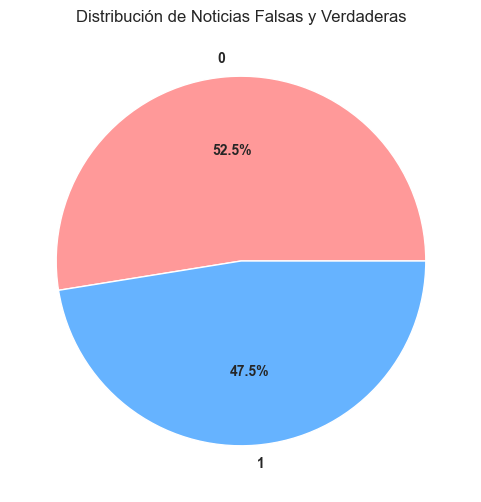

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Contar la distribución de las etiquetas
label_counts = data['label'].value_counts()

# Definir una lista de colores personalizados
colors = ['#ff9999', '#66b3ff']  # Puedes añadir más colores si tienes más categorías

# Crear la gráfica de pie con colores personalizados
plt.figure(figsize=(6, 6))
plt.pie(
    x=label_counts.values,
    labels=label_counts.keys(),
    autopct="%1.1f%%",
    textprops={"fontsize": 10, "fontweight": "bold"},
    colors=colors  # Aplicamos los colores personalizados
)

# Añadir título
plt.title('Distribución de Noticias Falsas y Verdaderas')

# Mostrar el gráfico
plt.show()


Podemos observar que tenemos una proporcion bastante similar de noticias falsas y verdaderas. Las verdaderas son 21417, es decir, 47,5% y las falsas 23481, es decir, 52,5%. Por lo que muestra que esta bastante equilibrado

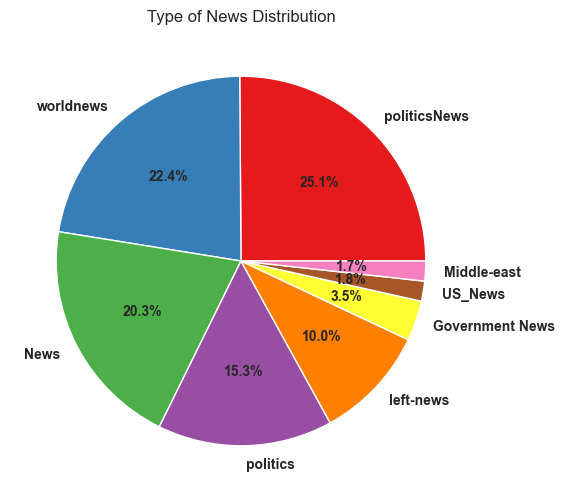

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Contar la distribución de las categorías en 'subject'
subject_counts = data['subject'].value_counts()

# Obtener una paleta de colores de Seaborn
colors = sns.color_palette('Set1', len(subject_counts))  # Paleta con colores brillantes

# Crear el gráfico de pie
plt.figure(figsize=(6, 6))
plt.pie(
    x=subject_counts.values,
    labels=subject_counts.keys(),
    autopct="%1.1f%%",
    textprops={"fontsize": 10, "fontweight": "bold"},
    colors=colors  # Usamos la paleta de colores de Seaborn
)

# Título del gráfico
plt.title('Type of News Distribution')

# Mostrar el gráfico
plt.show()


## Que palabras aparecen más

In [21]:
text = " ".join(data["text"])
tokens = text.split()

word_counts = Counter(tokens)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Setup tema seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("20 Most Frequently Occurring Words", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'Counter' is not defined

In [79]:
# Crear una tabla dinámica (pivot) para mostrar el número de noticias por 'subject' y 'label'
pivot = grouped.pivot_table(index='subject', columns='label', values='count', fill_value=0)

# Mostrar los resultados
print(pivot)


label                 0        1
subject                         
Government News  1570.0      0.0
Middle-east       778.0      0.0
News             9050.0      0.0
US_News           783.0      0.0
left-news        4459.0      0.0
politics         6838.0      0.0
politicsNews        0.0  11220.0
worldnews           0.0   9991.0


Algunos subject (como Government News, Middle-east, News, etc.) solo tienen noticias falsas (0), mientras que otros (politicsNews, worldnews) solo tienen noticias verdaderas (1).
Es posible que haya un sesgo en los datos o que los datos de ciertos temas estén desequilibrados, con una categoría que tiene muchas noticias verdaderas y ninguna falsa (o viceversa).

## OPCIONES
1. juntar las categorias
2. borrar subject y hacerlo simplemente con texto
3. utilizar técnicas de NLP para extraer más información de los textos y clasificarlos correctamente

Preprocesamiento de Datos con NLP:

El preprocesamiento es esencial para limpiar el texto y hacerlo adecuado para el modelo. Algunas de las técnicas comunes de preprocesamiento en NLP son:

Eliminación de caracteres no deseados: Usar expresiones regulares para eliminar caracteres especiales, números o puntuación.
Conversión a minúsculas: Hacer todo el texto en minúsculas para evitar duplicados como "noticia" y "Noticia".
Eliminación de stopwords: Las stopwords son palabras comunes (como "y", "el", "de") que no aportan mucho significado y pueden eliminarse.
Lematización o stemming: Reducir las palabras a su raíz o forma base, por ejemplo, "corriendo" → "correr".
Aquí tienes un ejemplo de código para preprocesar el texto:

https://oa.upm.es/71778/1/TFG_INNA_KRASIMIROVA_HRISTOVA.pdf

tranformar todo sin diferenciar minisculas y mayusculas 